In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [7]:
# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"
time = "2024-04-01_15:42"
time = "2024-04-01_17:06"
time = "2024-04-01_18:11"
time = "2024-04-16_16:47"
time = "2024-04-18_19:23"
time = "2024-04-18_20:30"
time = "2024-04-19_01:29"
time = "2024-04-19_09:39"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/unsupervised/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
df = df[df["algorithm"] == "gaussian_mixture"]
df = df[(df["test_negative_sharpe_ratio"] >= 0.25) | (df["test_sharpe_ratio"] >= 0.25)]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,n_clusters,algorithm,train_size,test_size,random_state
3503,40,2.14,214,362,0.27,27,100,2.14,214,3.189192,0.27,27,0.253558,-0.313790,90,gaussian_mixture,3840,960,65
3504,41,2.92,292,453,-0.30,-30,96,5.06,506,3.189192,-0.03,-3,0.253558,-0.313790,90,gaussian_mixture,3840,960,65
3505,42,2.11,211,448,1.05,105,139,7.17,717,3.189192,1.02,102,0.253558,-0.313790,90,gaussian_mixture,3840,960,65
3506,43,1.66,166,398,0.19,19,70,8.83,883,3.189192,1.21,121,0.253558,-0.313790,90,gaussian_mixture,3840,960,65
3507,44,1.80,180,410,0.01,1,80,10.63,1063,3.189192,1.22,122,0.253558,-0.313790,90,gaussian_mixture,3840,960,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88066,66,1.18,118,273,0.03,3,33,51.58,5158,3.266812,2.68,268,0.275313,-0.347033,100,gaussian_mixture,4800,960,36
88067,67,1.36,136,497,0.01,1,96,52.94,5294,3.266812,2.69,269,0.275313,-0.347033,100,gaussian_mixture,4800,960,36
88068,68,1.65,165,331,-0.02,-2,43,54.59,5459,3.266812,2.67,267,0.275313,-0.347033,100,gaussian_mixture,4800,960,36
88069,69,1.63,163,462,-0.27,-27,90,56.22,5622,3.266812,2.40,240,0.275313,-0.347033,100,gaussian_mixture,4800,960,36


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


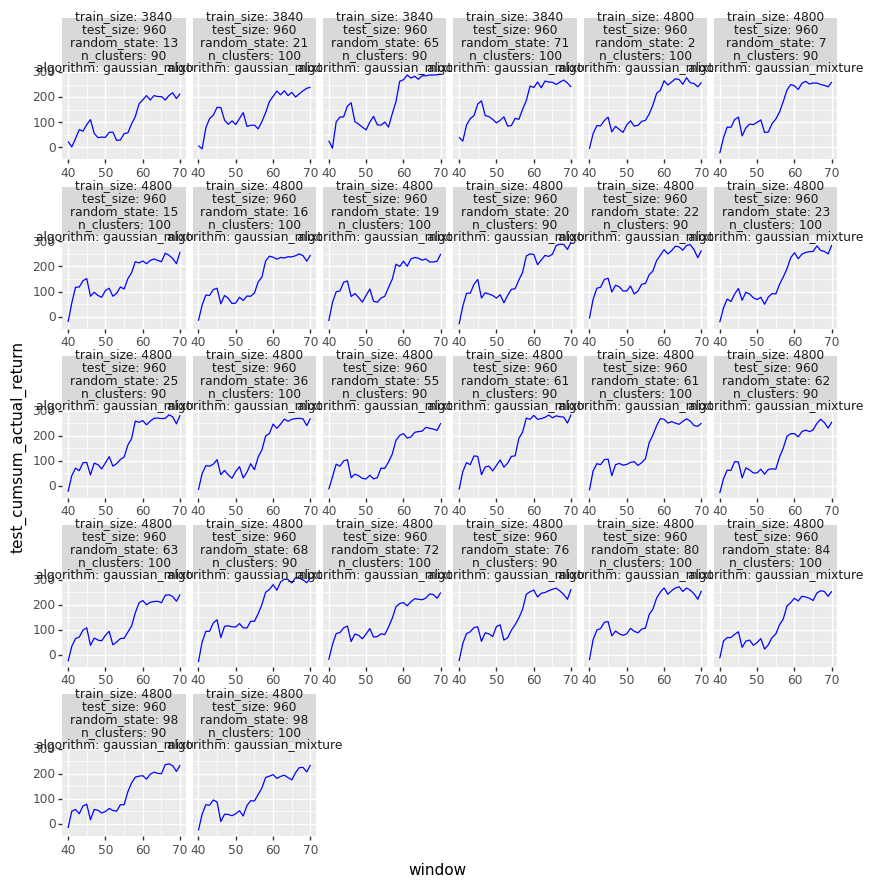

In [8]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters + algorithm", scales="free_x", labeller="label_both")
# p = p + theme(figure_size=(30, 30))
p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)

In [ ]:
4 * 24 * 20